# An initial Graph SBM test

In [1]:
pwd()

"/Users/jamiehaddock/Dropbox/My Mac (Jamies-Air-2)/Documents/GitHub/HyperCommDetect"

In [1]:
Base.load_path()

2-element Vector{String}:
 "/Users/jamiehaddock/.julia/environments/v1.6/Project.toml"
 "/Applications/Julia-1.6.app/Contents/Resources/julia/share/julia/stdlib/v1.6"

In [5]:
import Pkg
#Pkg.add("Conda")
#using Conda
#Conda.add("networkx")
#Pkg.add("PyCall")
#using PyCall
#nx = pyimport("networkx")
#Pkg.add("PyPlot")
#Conda.add("numpy")
#np = pyimport("numpy")
#Pkg.add("Parameters")
#Pkg.add("SparseArrays")
#Pkg.add("Clustering")
Pkg.add("Kronecker")
Pkg.add("StatsBase")

using Parameters
using Combinatorics
using Distributions
using DataFrames
using Kronecker
using StatsBase
#using Revise
using Test
#using PyPlot

using SparseArrays
using Clustering


using LinearAlgebra
using Arpack
using Statistics


#Pkg.add("Combinatorics")
#Pkg.add("Distributions")
#Pkg.add("DataFrames")
#Pkg.add("Arpack")
#Pkg.add("Statistics")
#Pkg.add("Revise")

#include("HypergraphNB/src/hypergraph.jl")
#include("HypergraphNB/src/samplers.jl")
#include("HypergraphNB/src/eigenstuff.jl")
#include("HypergraphNB/src/matrices.jl")
#include("HypergraphNB/src/HypergraphNB.jl")

include("HypergraphNB/src/hypergraph.jl")
include("HypergraphNB/src/utils.jl")
include("HypergraphNB/src/affinity-functions.jl")
include("HypergraphNB/src/HSBM.jl")
include("HypergraphNB/src/samplers.jl")
include("HypergraphNB/src/matrices.jl")
include("HypergraphNB/src/experiments.jl")
include("HypergraphNB/src/eigenstuff.jl")
include("HypergraphNB/src/degrees.jl")
include("HypergraphNB/src/edge-incidence.jl")
include("HypergraphNB/src/HypergraphNB.jl")


#using Pkg; Pkg.activate("./HypergraphNB")
using .HypergraphNB

### Generate a small SBM with *very* distinct communities

In [19]:
sizes = [10, 10, 20]
probs = [[0.7, 0.05, 0.02], [0.05, 0.7, 0.07], [0.02, 0.07, 0.7]]
g = nx.stochastic_block_model(sizes, probs, seed=0)

PyObject <networkx.classes.graph.Graph object at 0x7fce5249c040>

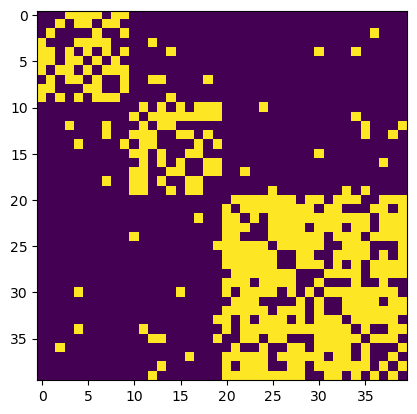

PyObject <matplotlib.image.AxesImage object at 0x7fce579099a0>

In [20]:
A = nx.to_numpy_matrix(g)
imshow(A)

In [21]:
using LinearAlgebra
F = svd(A)

SVD{Float64, Float64, Matrix{Float64}}
U factor:
40×40 Matrix{Float64}:
 -0.00405007   0.190678     0.292499   …   0.116461     0.0794298
 -0.00450978   0.148494     0.203066       0.0239778   -0.0359457
 -0.0116754    0.0883298    0.148474      -0.430026    -0.0596735
 -0.00664534   0.208276     0.233416      -0.287834    -0.0157825
 -0.0373083    0.241099     0.261406       0.0290545    0.195524
 -0.0039723    0.181118     0.284814   …  -0.0251462   -0.0874706
 -0.00305397   0.207975     0.29887       -0.261605    -0.0882403
 -0.0103308    0.279527     0.15366        0.0501775    0.0868222
 -0.00148244   0.14962      0.246866       0.377895    -0.135354
 -0.00570458   0.218552     0.252203       0.177135     0.131657
 -0.0303919    0.230209    -0.242086   …   0.173129     0.247529
 -0.0368472    0.326102    -0.28308       -0.1697      -0.238621
 -0.0367246    0.217604    -0.0323375      0.067582    -0.186132
  ⋮                                    ⋱               
 -0.232898    -0.059

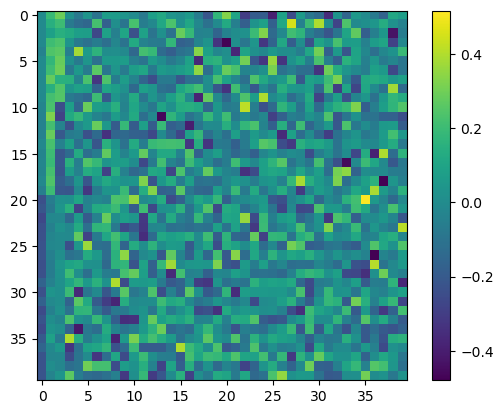

PyObject <matplotlib.colorbar.Colorbar object at 0x7fce530bae80>

In [22]:
imshow(F.U)
colorbar()

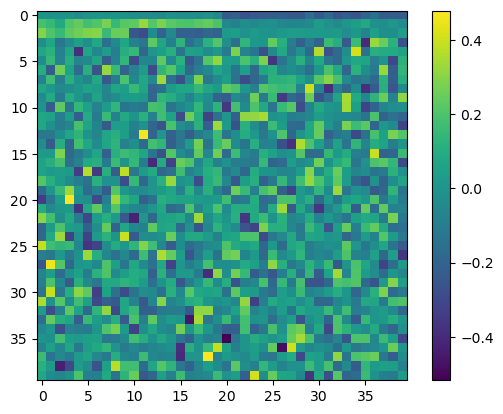

PyObject <matplotlib.colorbar.Colorbar object at 0x7fce551c4af0>

In [23]:
imshow(F.Vt)
colorbar()

In [24]:
F.S

40-element Vector{Float64}:
 14.361937320206508
  6.328156419521868
  5.393425300511831
  4.291123245210619
  3.60584503802327
  3.3764993889029995
  3.0643674213674252
  3.0042975558182516
  2.985384844949411
  2.8956937257066744
  2.694022450387883
  2.4941604712021346
  2.476744226991637
  ⋮
  1.0776694161101226
  0.9048775615195807
  0.8563945814172643
  0.7474825969073006
  0.6909856070695147
  0.5076977820377598
  0.4512847086690468
  0.3323519969966417
  0.2863296861172748
  0.17909671896561288
  0.08156283585322376
  0.004208769572052711

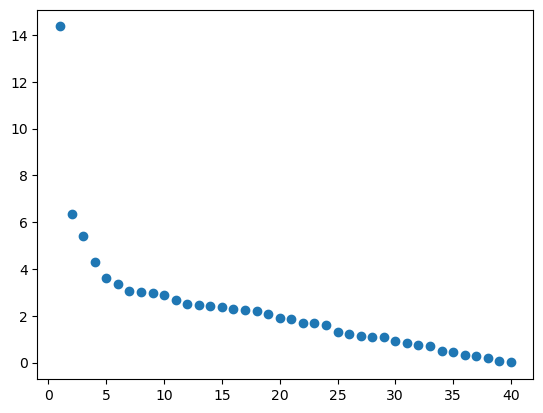

PyObject <matplotlib.collections.PathCollection object at 0x7fce55261eb0>

In [25]:
scatter([1:1:40;],F.S)

# A HSBM test

In [26]:
##


## 
# get some fake data to play with
n  = 100
c₂ = 10
c₃ = 10
p₂ = 0.99
p₃ = 0.99

H = detectabilityData(n, c₂, c₃, p₂, p₃);

z = 1 .+ (1:100 .> 50)



# "ground truth": full nonbacktracking matrix
B = nonBacktrackingMatrix(H);
E = eigs(B; nev = 2);

# partitioned up by edge size
Bs = nonBacktrackingMatrices(H);
B_ = sum(Bs)
E_ = eigs(B_; nev = 2)

@test E[1] ≈ E_[1]

# partitioned by edge size and returning edge indices
Bs, ix = nonBacktrackingMatrices(H; return_indices = true);
B_ = sum(Bs)
E_ = eigs(B_; nev = 2)

@test E[1] ≈ E_[1]



# partitioned by edge size and returning edge indices
Bs, ix = nonBacktrackingMatrices(H; return_indices = true);

B = sum(Bs)
E = eigs(B; nev = 2, ritzvec = true)

v = E[2][:,2]

u = aggregateEigenvector(v, ix)

# sign of u should correspond to clusters, should be 50 in each one
# random, so not a great test all things considered
@test sum(u .> 0) >= n/2 - 5 # should be exactly n/2, but close is ok

# packages up the above computations 
# starting from the computation of the combined
# matrix B
# z = binaryClusters(B, ix)


c, C = degreeTensor(H, z)

q = 1/n * [sum(z .== i) for i in unique(z)]

@test mean([q' * ((1/(k-1))*C[k,:,:]*q) ≈ c[k] for k ∈ 2:maximum(keys(H.E))]) == 1

Test Passed

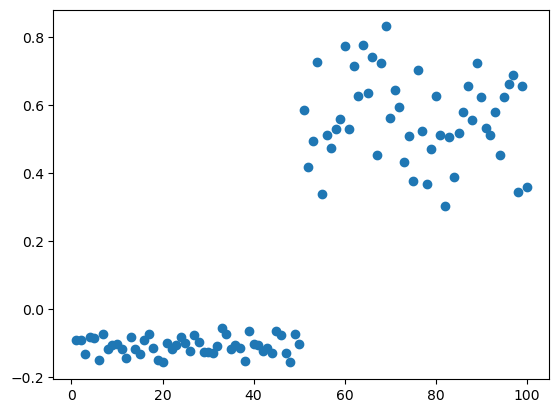

PyObject <matplotlib.collections.PathCollection object at 0x7fce565f0670>

In [30]:
scatter([1:1:100;],u)

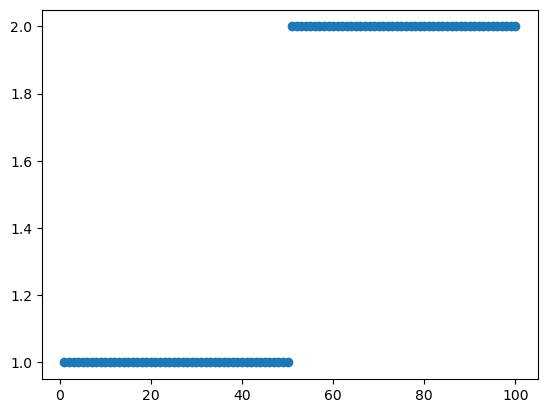

PyObject <matplotlib.collections.PathCollection object at 0x7fce56ae9730>

In [31]:
scatter([1:1:100;],z)

In [32]:
u_thresh = binaryClusters(B,ix)

100-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2

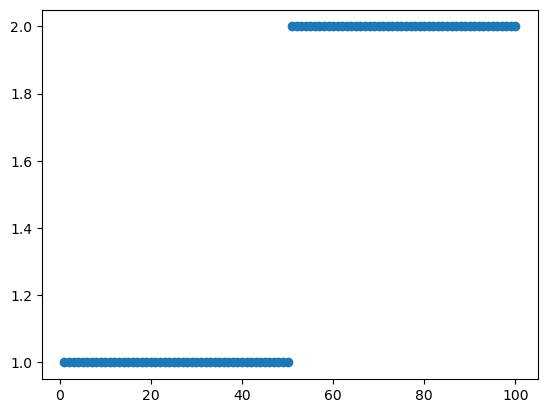

PyObject <matplotlib.collections.PathCollection object at 0x7fce56b41190>

In [33]:
scatter([1:1:100;],u_thresh)

In [35]:
mutualinfo(u_thresh,z)

1.0

## Correlation of Clustering Eigenvector with True Communities

In [24]:
n  = 100
c₂ = 10
c₃ = 10
z = 1 .+ (1:100 .> 50);

In [25]:
corrs = zeros(100,100);
for i in 0:99
    for j in 0:99
        p₂ = i/100
        p₃ = j/100
        H = detectabilityData(n, c₂, c₃, p₂, p₃);
        Bs, ix = nonBacktrackingMatrices(H; return_indices = true);
        B = sum(Bs);
        try 
            u_thresh = binaryClusters(B,ix)
            corrs[i+1,j+1] = mutualinfo(u_thresh,z)
            println(mutualinfo(u_thresh,z))
        catch E
        end
    end
end

1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.8585594574581794
1.0
1.0
1.0
0.9291252238549073
1.0
1.0
1.0
0.9291252238549073
0.8585594574581794
0.7648442977525687
0.7149460394223502
1.0
0.6009721799981695
0.8079616479391559
0.7648442977525687
0.7149460394223502
0.5642054529253083
0.4725010761214385
0.6597573034496934
0.5697389043881018
0.6009721799981687
0.24252715675612907
0.4463288874947234
0.31992295427172124
0.3291003239556136
0.3180138549429565
0.5006054392285252
0.6009721799981687
0.6349910030198413
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9291252238549073
0.9291252238549073
0.9291252238549073
1.0
0.9291252238549073
1.0
1.0
0.9291252238549073
1.0
1.0
0.7648442977525678
0.8347636587075113
0.8079616479391559
0.8347636587075113
0.6770006327837457
0.5978208097977282
0.5642054529253083
0.44297551540683655
0.5006054392285252
0.13135953929660443
0.5407862117028409
0.36689939338115446
0.32392379834363
0.5048484896887581
0.41725117676350293
0.3367051969554281
0.5512937220658848
0.6349910030198421
0.6770006327837449

0.5978208097977282
0.5697389043881018
0.6770006327837449
0.7149460394223502
0.48836910525280197
0.5541718004161497
0.7287008798015752
0.8079616479391559
0.6349910030198421
1.0
1.0
1.0
0.9291252238549073
1.0
0.9291252238549073
0.9291252238549073
0.8782063702756278
0.9291252238549073
0.8782063702756278
0.8347636587075122
1.0
0.9291252238549073
0.7149460394223502
0.8782063702756278
0.8782063702756278
0.8782063702756278
0.757707810917586
0.41576118835714426
0.5642054529253083
0.6425925571552908
0.6770006327837457
0.5333833942150724
0.5642054529253083
0.36689939338115446
0.39319347226663154
0.27888424255984984
0.26319736274863037
0.05784608233490494
0.3291003239556136
0.6009721799981687
0.39875321459928587
0.4463288874947234
0.6425925571552908
0.6349910030198413
0.7287008798015752
0.7265356414540423
0.6770006327837449
0.8585594574581794
1.0
1.0
1.0
0.9291252238549073
0.8585594574581794
1.0
1.0
0.9291252238549073
1.0
0.9291252238549073
0.8782063702756278
0.7149460394223502
0.8079616479391559

0.8079616479391559
0.610963714728456
0.8347636587075113
0.41725117676350293
0.6425925571552908
0.5333833942150724
0.47250107612143766
0.32091195187981514
0.3656904453594345
0.32091195187981514
0.44632888749472255
0.22213960068646948
0.3864275229414351
0.5048484896887588
0.5333833942150724
0.4463288874947234
0.6009721799981695
0.5407862117028409
0.5642054529253083
0.5978208097977273
0.6917588737329787
0.610963714728456
0.5333833942150724
0.757707810917586
0.6725550808455238
0.6009721799981687
0.757707810917586
0.7265356414540423
0.8347636587075113
0.7648442977525687
0.8782063702756278
0.8585594574581794
1.0
1.0
1.0
1.0
1.0
0.8079616479391559
0.7648442977525678
0.757707810917586
1.0
0.7149460394223502
0.8079616479391559
0.8585594574581794
0.7648442977525687
0.757707810917586
0.6349910030198421
0.2780719051126385
0.5310044064107187
0.6770006327837457
0.6009721799981695
0.36689939338115446
0.3425675669167143
0.3904935986852868
0.32392379834363
0.260180954594777
0.2987519751181318
0.0353790

0.4725010761214385
0.5333833942150724
0.5642054529253083
0.5048484896887581
0.7648442977525687
0.6349910030198413
0.610963714728456
0.8079616479391559
0.9291252238549073
0.6425925571552908
0.8347636587075113
0.7648442977525687
1.0
0.7287008798015752
0.757707810917586
0.9291252238549073
0.8782063702756278
0.6725550808455238
0.8079616479391559
1.0
1.0
0.9291252238549073
0.8585594574581794
0.8782063702756278
0.8347636587075113
0.8079616479391559
0.6725550808455238
0.9291252238549073
0.5642054529253083
0.7648442977525687
0.8079616479391559
0.6349910030198413
0.610963714728456
0.4725010761214385
0.3904935986852868
0.41725117676350293
0.26319736274863037
0.41576118835714426
0.5642054529253083
0.5040175340948665
0.42181684534014424
0.5048484896887588
0.5642054529253083
0.8079616479391559
0.7648442977525678
0.8347636587075113
0.6349910030198421
0.7265356414540423
0.6725550808455238
0.7265356414540423
1.0
0.757707810917586
0.9291252238549073
0.7265356414540423
0.8782063702756278
0.8347636587075

0.5816101791805879
0.4706391347126356
0.4463288874947234
0.4706391347126356
0.4429755154068357
0.5006054392285252
0.7149460394223502
0.757707810917586
0.7648442977525687
0.610963714728456
0.5697389043881018
0.5642054529253083
0.6349910030198421
0.8079616479391559
0.8782063702756278
0.7149460394223502
0.9291252238549073
0.8585594574581794
1.0
0.8782063702756278
0.6300279203045593
0.8782063702756278
0.9291252238549073
0.8782063702756278
1.0
0.8585594574581794
0.9291252238549073
0.9291252238549073
0.9291252238549073
0.9291252238549073
0.8782063702756278
0.8079616479391559
0.7149460394223502
0.6917588737329787
0.6425925571552908
0.6009721799981687
0.6725550808455238
0.7265356414540423
0.5407862117028409
0.44297551540683655
0.39319347226663154
0.47823917219523826
0.3904935986852868
0.14786423385306405
0.007325622571955868
0.421816845340145
0.2055072236141036
0.6009721799981695
0.6300279203045593
0.5541718004161497
0.7265356414540423
0.6009721799981695
0.7648442977525678
0.6009721799981695
0

0.44297551540683655
0.6725550808455238
0.6009721799981695
0.3656904453594345
0.6009721799981695
0.8347636587075113
0.7287008798015752
0.757707810917586
0.5978208097977273
0.6770006327837457
0.6425925571552908
0.5697389043881018
0.610963714728456
0.8079616479391559
0.9291252238549073
0.8079616479391559
0.7648442977525678
0.9291252238549073
0.8782063702756278
0.6917588737329787
0.7648442977525687
0.9291252238549073
0.8782063702756278
0.8585594574581794
0.9291252238549073
0.8585594574581794
1.0
1.0
0.8782063702756278
1.0
1.0
1.0
0.9291252238549073
1.0
1.0
0.41725117676350293
0.6425925571552908
0.4725010761214385
0.41576118835714426
0.5333833942150724
0.03537901103653608
0.035220214954072175
0.00259982944621072
0.6349910030198413
0.5642054529253083
0.21961162979491844
0.6425925571552908
0.7149460394223502
0.6917588737329787
0.5310044064107187
0.8347636587075113
0.41725117676350293
0.7149460394223502
0.7149460394223502
0.8079616479391559
0.8079616479391559
0.8347636587075113
0.8347636587075

0.0002887154108155846
0.001156984433530681
0.00259982944621072
0.0011544640047993322
0.610963714728456
0.44297551540683655
0.6770006327837457
0.5333833942150724
0.6917588737329787
0.7265356414540423
0.7149460394223502
0.6349910030198413
0.3769685615198195
0.7265356414540423
0.7265356414540423
0.7149460394223502
0.757707810917586
0.796128522054909
0.757707810917586
0.8079616479391559
0.8782063702756278
0.8079616479391559
0.7265356414540423
0.9291252238549073
0.8079616479391559
0.8585594574581794
0.8782063702756278
0.9291252238549073
1.0
0.9291252238549073
0.9291252238549073
0.796128522054909
1.0
1.0
1.0
0.9291252238549073
1.0
1.0
0.9291252238549073
1.0
1.0
1.0
1.0
1.0
1.0
0.1732536275073828
0.3705903116317813
0.14491054713883975
0.03522021495407297
0.3705903116317813
0.5137532911122109
0.002611220469271669
0.5816101791805879
0.44297551540683655
0.421816845340145
0.7149460394223502
0.757707810917586
0.8782063702756278
0.6917588737329787
0.7149460394223502
0.610963714728456
0.807961647939

0.5816101791805879
0.41725117676350293
0.4463288874947234
0.610963714728456
0.5978208097977273
0.5697389043881018
0.5642054529253083
0.6917588737329787
0.6770006327837449
0.6770006327837457
0.8585594574581794
0.8079616479391559
0.6597573034496934
0.8782063702756278
0.9291252238549073
0.8585594574581794
0.8782063702756278
1.0
1.0
0.8782063702756278
0.8585594574581794
0.9291252238549073
0.9291252238549073
1.0
0.8782063702756278
0.9291252238549073
1.0
0.9291252238549073
1.0
0.8585594574581794
1.0
1.0
0.9291252238549073
0.9291252238549073
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9291252238549073
0.049355957046141076
0.004662264774344514
0.023512589384438953
0.0002887154108155846
0.00259982944621072
0.00726130698485406
0.5006054392285252
0.5697389043881018
0.7149460394223502
0.6770006327837457
0.5978208097977282
0.6349910030198421
0.6425925571552908
0.757707810917586
0.6425925571552908
0.5283779304228369
0.5642054529253083
0.6349910030198421
0.8079616479391559
0.8079616479391559
0.83476365

0.0851236419685085
0.6725550808455238
0.7149460394223502
0.5642054529253083
0.5642054529253083
0.8585594574581794
0.7149460394223502
0.7648442977525678
0.8079616479391559
0.8585594574581794
0.7648442977525687
0.7149460394223502
0.6725550808455238
0.8079616479391559
0.8782063702756278
0.8347636587075122
1.0
0.8347636587075113
0.9291252238549073
0.9291252238549073
0.9291252238549073
0.8782063702756278
1.0
1.0
0.9291252238549073
1.0
0.8782063702756278
1.0
0.8079616479391559
1.0
0.9291252238549073
1.0
0.9291252238549073
1.0
1.0
0.8782063702756278
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.5283779304228369
0.7149460394223502
0.5310044064107187
0.4725010761214385
0.6349910030198413
0.6425925571552908
0.757707810917586
0.757707810917586
0.7149460394223502
0.8585594574581794
0.7648442977525678
0.8585594574581794
0.6009721799981695
0.6300279203045593
0.7648442977525687
0.9291252238549073
0.8782063702756278
0.8782063702756278
0.9291252238549073
0.9291252238549073
0.929125223854907

0.3769685615198204
0.6770006327837449
0.757707810917586
0.3425675669167143
0.7149460394223502
0.4706391347126356
0.7265356414540423
0.4725010761214385
0.7149460394223502
0.8585594574581794
0.6917588737329787
0.7265356414540423
0.6425925571552908
0.7265356414540423
0.9291252238549073
0.8585594574581794
0.7648442977525687
1.0
0.9291252238549073
0.9291252238549073
0.8782063702756278
0.8782063702756278
1.0
0.9291252238549073
1.0
0.9291252238549073
0.8585594574581794
1.0
0.8585594574581794
1.0
0.9291252238549073
0.9291252238549073
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9291252238549073
1.0
1.0
0.9291252238549073
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.3656904453594345
0.6009721799981695
0.7648442977525687
0.41725117676350293
0.5333833942150724
0.6425925571552908
0.610963714728456
0.6770006327837449
0.6349910030198413
0.6917588737329787
0.8079616479391559
0.6349910030198421
0.6725550808455238
0.8079616479391559
0.6917588737329787
0.796128522054909
0.9291252238549073
0.7610260716417303
1.0
0

0.5137532911122109
0.3425675669167143
0.34927211071652203
0.4706391347126356
0.5642054529253083
0.45328394803408667
0.7149460394223502
0.5048484896887581
0.6917588737329787
0.6349910030198413
0.8782063702756278
0.7149460394223502
0.8782063702756278
0.9291252238549073
0.7149460394223502
0.9291252238549073
0.8079616479391559
0.9291252238549073
0.9291252238549073
0.9291252238549073
0.8782063702756278
0.9291252238549073
0.8079616479391559
0.8782063702756278
0.9291252238549073
1.0
0.9291252238549073
0.9291252238549073
1.0
1.0
0.8782063702756278
1.0
1.0
1.0
1.0
1.0
0.9291252238549073
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.3291003239556136
0.44297551540683655
0.757707810917586
0.9291252238549073
0.6725550808455238
0.6770006327837457
0.7149460394223502
0.7149460394223502
0.7610260716417303
0.6917588737329787
0.757707810917586
0.5978208097977273
0.7149460394223502
0.7149460394223502
0.8782063702756278
0.8079616479391559
0.8585594574581794
0.698

0.4429755154068357
0.34476605733504795
0.5978208097977273
0.7149460394223502
0.47250107612143766
0.7149460394223502
0.6917588737329787
0.9291252238549073
0.7265356414540423
0.8782063702756278
0.6770006327837449
0.8585594574581794
0.9291252238549073
0.8585594574581794
0.7149460394223502
0.8079616479391559
1.0
0.8585594574581794
0.9291252238549073
0.9291252238549073
0.8782063702756278
0.9291252238549073
1.0
0.8585594574581794
0.8347636587075122
1.0
1.0
0.9291252238549073
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9291252238549073
1.0
1.0
1.0
0.9291252238549073
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9291252238549073
1.0
1.0
1.0
1.0
0.9291252238549073
1.0
1.0
1.0
0.6770006327837457
0.5333833942150724
0.3904935986852868
0.6917588737329787
0.6725550808455238
0.6349910030198413
0.7648442977525687
0.757707810917586
0.7265356414540423
0.9291252238549073
0.8347636587075113
0.8585594574581794
1.0
0.757707810917586
0.9291252238549073
0.8079616479391559
0.757707810917586
1.0
0

0.4706391347126356
0.44297551540683655
0.6349910030198413
0.6597573034496934
0.7265356414540423
0.285581736037246
0.9291252238549073
0.7265356414540423
0.8079616479391559
0.7961285220549098
0.7648442977525687
0.6009721799981695
0.7149460394223502
0.8079616479391559
0.7149460394223502
0.796128522054909
1.0
1.0
0.8782063702756278
0.8079616479391559
0.9291252238549073
0.8782063702756278
0.9291252238549073
0.9291252238549073
0.9291252238549073
0.9291252238549073
0.9291252238549073
1.0
1.0
0.9291252238549073
0.8782063702756278
1.0
1.0
1.0
1.0
0.9291252238549073
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.00259982944621072
0.7149460394223502
0.7149460394223502
0.7648442977525687
0.6425925571552908
0.6725550808455238
0.6425925571552908
0.7648442977525678
0.757707810917586
0.8079616479391559
0.8079616479391559
0.7648442977525687
0.9291252238549073
0.878206370275

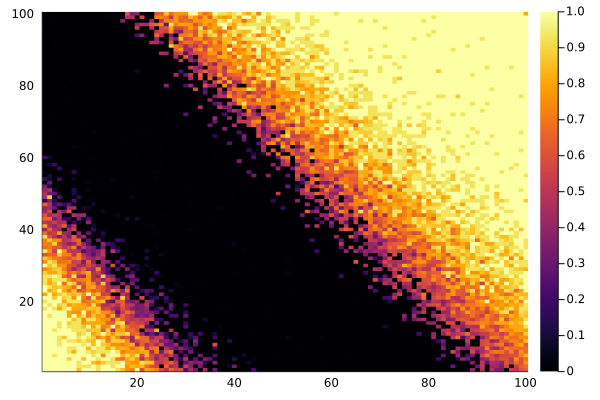

In [26]:
using Plots
heatmap(corrs)

# Correlation of Reduced Matrix Clustering Eigenvector with True Communities

In [6]:
n  = 100
c₂ = 10
c₃ = 10
z = 1 .+ (1:100 .> 50);
p₂ = 90/100
p₃ = 90/100
H = detectabilityData(n, c₂, c₃, p₂, p₃);
B = reducedNonBacktrackingMatrix(H);
E = Arpack.eigs(B; nev = 2, ritzvec = true);
u = E[2][:,2]

400-element Vector{ComplexF64}:
  -0.05375768665308089 + 0.0im
  -0.08416480940841135 + 0.0im
 -0.014235608775954712 + 0.0im
  -0.09981609633044594 + 0.0im
  -0.00678732173990069 + 0.0im
  -0.05315595025694714 + 0.0im
 -0.038441454338420805 + 0.0im
  -0.05190764319016088 + 0.0im
  -0.05370027508597089 + 0.0im
  -0.03536437766433801 + 0.0im
 -0.061462072458607506 + 0.0im
  -0.03428482943563919 + 0.0im
  -0.03409693442650228 + 0.0im
                       ⋮
   0.05676445328267511 + 0.0im
   0.06513200023201754 + 0.0im
    0.0423230758605019 + 0.0im
   0.06921682620953469 + 0.0im
  0.038421374279291765 + 0.0im
  0.020262948734961983 + 0.0im
   0.06183640644629976 + 0.0im
   0.07941646923586602 + 0.0im
   0.07298462473859588 + 0.0im
   0.06868604530190975 + 0.0im
   0.05408112263512637 + 0.0im
   0.08275519329412434 + 0.0im

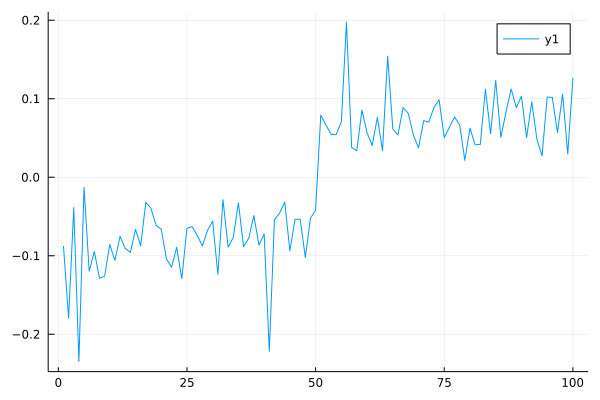

In [12]:
using Plots
plot(real.(u[1:1:100]+u[101:1:200]))

In [17]:
corrs = zeros(100,100);
for i in 0:99
    for j in 0:99
        p₂ = i/100
        p₃ = j/100
        H = detectabilityData(n, c₂, c₃, p₂, p₃);
        B = reducedNonBacktrackingMatrix(H);
        #B = sum(Bs);
        try 
        #    u_thresh = binaryClusters(B,ix)
            E = Arpack.eigs(B; nev = 2, ritzvec = true);
            u = E[2][:,2]
            u_thresh = real.(u[1:1:100]+u[101:1:200]).> 0
            corrs[i+1,j+1] = mutualinfo(u_thresh,z)
            println(mutualinfo(u_thresh,z))
        catch E
        end
    end
end

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9291252238549073
0.9291252238549073
1.0
0.8782063702756278
1.0
0.9291252238549073
0.9291252238549073
1.0
1.0
0.8782063702756278
0.8782063702756278
0.8585594574581794
0.8782063702756278
0.8079616479391559
0.8079616479391559
0.6009721799981695
0.2987519751181318
0.5697389043881018
0.6770006327837449
0.34476605733504795
0.6022111600455692
0.5006054392285252
0.6009721799981695
0.3705903116317813
0.5697389043881018
0.278884242559849
0.2987519751181318
0.2780719051126385
0.11899809135944658
0.09561854227550651
0.17370025636967718
0.010435392710892142
0.014192781347009707
0.0002899779009727922
0.1100544454822393
0.09584605930607597
0.0011646013497917454
0.010412478777945086
0.05744833341206656
0.018711446343983675
0.018711446343983675
1.610095796060929e-16
0.004631680941037749
0.13135953929660443
0.007229504798286246
0.05744833341206656
0.018546104966347125
0.002634255440327551
0.004621561179775
0.018711446343983675
0.004631680941036947
0.014192781347009707
0

1.0
0.9291252238549073
0.8782063702756278
0.9291252238549073
0.7149460394223502
0.8585594574581794
0.7648442977525678
0.8585594574581794
0.6425925571552908
0.796128522054909
0.34476605733504795
0.7648442977525687
0.5333833942150724
0.7265356414540423
0.757707810917586
0.6425925571552908
0.4429755154068357
0.26319736274863037
0.25870096797707853
0.34476605733504795
0.31992295427172124
0.5006054392285252
0.18884536225760112
0.0011544640047993322
0.34476605733504795
0.23983249703803358
0.002611220469271669
0.18884536225760193
0.13332664069753888
0.0851236419685085
0.058519792136738844
0.023512589384438953
0.0072613069848532575
0.014192781347009707
0.01858720728772227
0.001156984433530681
0.13135953929660366
0.07588733707726601
0.01858720728772227
0.001156984433530681
0.010412478777945086
0.0
0.004662264774344514
0.018711446343983675
0.00259982944621072
4.807915038147209e-16
0.002634255440328355
0.0002899779009727922
4.805139755722373e-16
0.035220214954072175
0.029310814442539714
1.6100957

0.42019506299363896
0.5333833942150724
0.4297713713188505
0.44297551540683655
0.6770006327837457
0.5333833942150724
0.6022111600455701
0.6725550808455238
0.6770006327837449
0.6349910030198421
0.7648442977525687
1.0
1.0
1.0
1.0
1.0
0.8782063702756278
0.8585594574581794
1.0
1.0
0.8585594574581794
0.9291252238549073
0.8782063702756278
0.7648442977525687
0.8347636587075113
0.8782063702756278
0.6349910030198421
0.6349910030198413
0.7648442977525687
0.5978208097977282
0.7648442977525687
0.757707810917586
0.6770006327837449
0.5006054392285252
0.5978208097977282
0.6349910030198413
0.610963714728456
0.035379011036536887
0.2587009679770793
0.41725117676350293
0.2780719051126385
0.18983907181393647
0.07518129502697048
0.32091195187981514
0.049355957046141076
0.014255592878046208
0.10740637377591714
0.004631680941037749
0.1320091805411245
0.049355957046141076
0.09653450898202467
0.010435392710892943
0.05744833341206656
0.0002899779009727922
0.001156984433530681
0.04205291843043396
0.03522021495407

0.004713998200230719
0.00028871541081638557
0.007325622571955868
0.10689068536962268
0.3291003239556136
0.32392379834363
0.4297713713188505
0.3705903116317813
0.2987519751181318
0.34476605733504795
0.36689939338115446
0.5310044064107187
0.31992295427172124
0.5697389043881018
0.5407862117028409
0.5642054529253083
0.39319347226663154
0.44632888749472255
0.41576118835714426
0.5642054529253083
0.7149460394223502
0.6725550808455238
0.7648442977525678
0.8782063702756278
0.8079616479391559
0.6425925571552908
0.9291252238549073
1.0
0.9291252238549073
1.0
1.0
0.8585594574581794
0.8079616479391559
0.8782063702756278
0.8585594574581794
0.6917588737329787
0.8079616479391559
0.7648442977525687
0.5642054529253083
0.8585594574581794
0.6770006327837449
0.6009721799981687
0.5642054529253083
0.7648442977525687
0.7265356414540423
0.6349910030198421
0.47250107612143766
0.6009721799981695
0.5978208097977282
0.2055072236141036
0.3425675669167143
0.010435392710892142
0.018711446343983675
0.010412478777945086

0.24252715675612985
0.0002887154108155846
0.010435392710892943
0.00259982944621072
0.09561854227550651
0.007229504798286246
0.023512589384438953
0.018711446343983675
0.04205291843043396
0.00028871541081638557
0.004788064483640611
0.001177484561621155
0.004621561179775
0.010435392710892943
0.0002899779009727922
0.0011544640047993322
0.02911438311889127
0.004621561179775
0.007229504798286246
0.0026694535914463064
0.01858720728772227
4.805139755722373e-16
0.001156984433530681
0.05003755192562356
0.05744833341206656
0.004631680941037749
0.001156984433530681
0.158635738051693
0.2987519751181318
0.0002899779009727922
0.010621809793434361
0.035220214954072175
0.17505374852818223
0.17735610324672538
0.44632888749472255
0.25782425359986266
0.18983907181393647
0.3705903116317813
0.2987519751181318
0.3005535406444826
0.0002887154108155846
0.5333833942150724
0.41576118835714426
0.5697389043881018
0.4782391721952391
0.6349910030198413
0.5978208097977282
0.757707810917586
0.5816101791805879
0.634991

0.6725550808455238
0.6770006327837449
0.9291252238549073
0.8782063702756278
0.8585594574581794
0.7648442977525687
0.7648442977525687
0.8585594574581794
0.9291252238549073
1.0
0.9291252238549073
0.8079616479391559
0.8585594574581794
0.8347636587075113
0.5310044064107187
0.6917588737329787
0.5978208097977282
0.6009721799981687
0.7265356414540423
0.757707810917586
0.8079616479391559
0.42181684534014424
0.41576118835714426
0.014192781347009707
0.36689939338115446
0.22213960068646948
0.20999684257594792
0.018711446343983675
0.10689068536962187
0.04205291843043396
0.158635738051693
0.09653450898202467
0.18884536225760112
0.001156984433530681
1.610095796060929e-16
0.042339977214407284
0.1320091805411245
0.007229504798286246
0.0002899779009727922
0.018546104966347125
0.00726130698485406
0.00028871541081638557
0.042052918430433156
0.0002899779009727922
0.00726130698485406
0.014192781347009707
0.002611220469271669
0.0011544640047993322
0.001156984433530681
0.0002899779009727922
0.000288715410815

0.004631680941037749
4.805139755722373e-16
0.0011544640047993322
0.018546104966347125
0.007325622571955868
0.023512589384438953
0.0011959270899627656
0.0072613069848532575
0.014192781347009707
0.014192781347009707
0.010412478777945086
0.0002887154108155846
0.0002899779009727922
0.004631680941037749
0.00259982944621072
0.004621561179775
0.5006054392285252
0.3239237983436291
0.004631680941037749
0.22335453837072472
0.6009721799981695
0.26319736274863037
0.44297551540683655
0.44297551540683655
0.41576118835714426
0.4429755154068357
0.5760367196319853
0.5978208097977282
0.3904935986852868
0.5642054529253083
0.8585594574581794
0.8079616479391559
0.7265356414540423
0.7648442977525678
0.6770006327837449
0.7287008798015752
0.757707810917586
0.6770006327837449
0.8079616479391559
0.7265356414540423
0.796128522054909
0.9291252238549073
0.8585594574581794
0.8782063702756278
0.9291252238549073
0.8782063702756278
0.8585594574581794
1.0
0.8585594574581794
1.0
0.7648442977525678
0.757707810917586
0.59

0.4463288874947234
0.30055354064448175
0.3239237983436291
0.00259982944621072
0.4463288874947234
0.0851236419685085
0.049355957046141076
0.004662264774344514
0.002611220469271669
0.05784608233490494
0.042052918430433156
0.010504647530909253
0.002634255440328355
0.035220214954072175
0.00259982944621072
0.002634255440328355
0.00726130698485406
0.0002899779009727922
0.01050464753090845
0.004621561179775
0.004631680941037749
0.023512589384438953
4.807915038147209e-16
0.0011544640047993322
0.014192781347009707
0.0002899779009727922
0.010504647530909253
0.004662264774344514
0.00726130698485406
0.0002899779009727922
0.01858720728772147
0.0011646013497917454
0.00029253081409773453
4.805139755722373e-16
0.04205291843043396
4.807915038147209e-16
0.004621561179775
0.17505374852818223
0.0002899779009727922
0.0002899779009727922
0.0011544640047993322
0.11870910076930784
4.807915038147209e-16
0.004713998200230719
0.00028871541081638557
0.3656904453594345
0.002611220469271669
0.34476605733504795
0.39

0.5978208097977273
0.5333833942150724
0.6349910030198413
0.6770006327837449
0.18884536225760193
0.6597573034496934
0.6597573034496934
0.6425925571552908
0.6770006327837449
0.6917588737329787
0.6770006327837449
0.5642054529253083
0.7149460394223502
0.8347636587075113
0.757707810917586
0.8079616479391559
0.7149460394223502
0.7265356414540423
0.7648442977525687
1.0
0.8782063702756278
0.9291252238549073
0.8782063702756278
0.8347636587075122
0.9291252238549073
0.9291252238549073
0.8585594574581794
1.0
0.9291252238549073
0.9291252238549073
1.0
1.0
1.0
0.8782063702756278
0.5310044064107187
0.6349910030198421
0.5137532911122109
0.5978208097977273
0.6009721799981687
0.39875321459928587
0.421816845340145
0.001156984433530681
0.023512589384438953
0.2780719051126385
0.14491054713883975
0.24050017325584572
0.004621561179775
0.014382636076432462
0.001177484561621155
0.002634255440328355
0.0428259941262729
0.007229504798286246
0.13135953929660366
0.004631680941036947
0.0002899779009727922
0.010435392

0.014382636076432462
0.00028871541081638557
4.807915038147209e-16
0.002717628531942307
0.01858720728772147
0.014255592878047011
0.00029253081409773453
0.019222796548405162
0.00259982944621072
0.0003017697373490684
0.018546104966347125
0.014192781347009707
0.00028871541081638557
0.14454918943986997
0.2587009679770793
0.007229504798286246
0.004631680941036947
4.807915038147209e-16
0.24050017325584572
0.44297551540683655
0.0011544640047993322
0.5407862117028409
0.001156984433530681
0.610963714728456
0.4725010761214385
0.610963714728456
0.39319347226663154
0.5978208097977273
0.698650799163014
0.3099598024256474
0.7265356414540423
0.5642054529253083
0.757707810917586
0.757707810917586
0.7648442977525687
0.8585594574581794
0.7648442977525687
0.7149460394223502
0.8585594574581794
0.8347636587075122
0.7961285220549098
0.8585594574581794
0.9291252238549073
0.796128522054909
0.7648442977525687
0.8585594574581794
1.0
1.0
1.0
0.9291252238549073
1.0
0.9291252238549073
0.9291252238549073
0.757707810

0.0851236419685085
0.0495813552340239
0.278884242559849
4.807915038147209e-16
0.07518129502697048
0.03522021495407297
0.001156984433530681
0.04195797777370043
0.00259982944621072
0.03537901103653608
0.014192781347009707
0.010435392710892142
0.0002899779009727922
0.004621561179775
4.807915038147209e-16
0.00028871541081638557
0.018711446343983675
0.002634255440328355
0.0236175008356482
0.00726130698485406
0.018546104966347125
0.0011544640047993322
0.023512589384438953
0.0002887154108155846
0.004621561179775
0.010435392710892943
0.0072613069848532575
0.0002887154108155846
0.002611220469271669
0.023512589384438953
0.010435392710892943
0.042339977214407284
0.0002887154108155846
0.042339977214407284
0.018921669336915782
0.004631680941037749
0.00259982944621072
4.807915038147209e-16
0.0011544640047993322
0.2987519751181318
0.0002899779009727922
0.00029253081409773453
0.00259982944621072
0.0002964314858686288
0.5048484896887581
0.007229504798286246
0.3656904453594345
0.2055072236141036
0.00263

0.02911438311889127
0.018711446343983675
0.004621561179775
0.0011544640047993322
0.004631680941037749
0.0011646013497917454
0.00259982944621072
0.02911438311889127
0.00726130698485406
0.002634255440328355
0.001156984433530681
0.004631680941037749
0.004621561179775
0.02382973136015079
4.807915038147209e-16
0.004631680941036947
0.00029253081409773453
0.014192781347009707
0.00028871541081638557
0.34927211071652203
0.010504647530909253
0.17505374852818142
0.001156984433530681
0.004631680941037749
0.3904935986852868
0.31992295427172124
0.6770006327837457
0.4725010761214385
0.4463288874947234
0.5333833942150724
0.6349910030198421
0.8079616479391559
0.36689939338115446
0.47823917219523826
0.6770006327837449
0.8079616479391559
0.8079616479391559
0.5040175340948665
1.0
0.7149460394223502
0.8347636587075113
0.7648442977525687
0.8079616479391559
0.8079616479391559
0.9291252238549073
0.7648442977525678
0.8585594574581794
0.8782063702756278
0.8347636587075122
0.8079616479391559
0.9291252238549073
1

0.2987519751181318
0.00259982944621072
0.00726130698485406
0.004662264774344514
0.00259982944621072
0.4706391347126356
0.001156984433530681
0.4725010761214385
0.4725010761214385
0.6770006327837449
0.4463288874947234
0.6009721799981695
0.6300279203045593
0.3291003239556136
0.5978208097977282
0.6425925571552908
0.6300279203045586
0.6770006327837449
0.7149460394223502
0.8782063702756278
0.796128522054909
0.8585594574581794
0.7648442977525678
0.8347636587075113
0.8585594574581794
0.7648442977525678
0.9291252238549073
1.0
0.8585594574581794
1.0
0.7149460394223502
1.0
0.757707810917586
0.8782063702756278
0.9291252238549073
0.9291252238549073
0.8782063702756278
1.0
0.9291252238549073
1.0
1.0
0.9291252238549073
1.0
0.9291252238549073
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9291252238549073
1.0
0.18884536225760112
0.0002887154108155846
0.0236175008356482
0.00029253081409773453
0.0002887154108155846
0.019222796548405162
0.00259982944621072
0.010504647530909253
0.010412478777945086
0.001154

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.01858720728772147
0.0002899779009727922
0.004631680941037749
0.004631680941036947
0.001177484561621155
0.023512589384438953
0.001156984433530681
0.00259982944621072
0.02382973136015079
0.018546104966347125
0.0011544640047993322
0.0236175008356482
0.014192781347009707
0.030119699730181602
0.007229504798286246
0.002634255440328355
0.00259982944621072
0.004621561179775
0.00028871541081638557
0.007229504798286246
0.0002899779009727922
0.007229504798286246
0.004662264774344514
0.001156984433530681
0.00259982944621072
0.010412478777945086
0.0002899779009727922
0.00259982944621072
1.6054230322890294e-16
0.260180954594777
0.00259982944621072
0.002611220469271669
0.014192781347009707
0.002611220469271669
0.0002887154108155846
0.0002887154108155846
4.807915038147209e-16
0.304234036990495
0.5978208097977282
0.610963714728456
0.8079616479391559
0.5816101791805879
0.5642054529253083
0.5310044064107187
0.7648442977525687
0.5642054529253083
0.8079

0.8782063702756278
0.8585594574581794
0.8585594574581794
0.757707810917586
0.8079616479391559
0.9291252238549073
0.9291252238549073
0.8585594574581794
0.9291252238549073
0.9291252238549073
1.0
1.0
1.0
1.0
1.0
1.0
0.9291252238549073
0.9291252238549073
0.8347636587075113
0.9291252238549073
1.0
1.0
1.0
0.9291252238549073
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.014576828435880498
0.004631680941037749
0.002717628531942307
0.014192781347009707
0.001156984433530681
0.0002899779009727922
0.010435392710892142
0.0011544640047993322
0.0026694535914463064
0.010412478777945086
0.0011544640047993322
0.0002887154108155846
0.014255592878047011
0.014255592878046208
0.002611220469271669
0.00259982944621072
0.0011774845616203502
0.004621561179775
0.04195797777370043
0.00029253081409773453
0.001156984433530681
0.0011544640047993322
0.0011544640047993322
0.001156984433530681
0.0002899779009727922
0.001156984433530681
0.24050017325584572
0.002611220469271669
0.00029253081409773453
0.0011569844

1.0
1.0
0.9291252238549073
1.0
1.0
0.9291252238549073
1.0
1.0
0.9291252238549073
1.0
1.0
0.9291252238549073
1.0
1.0
0.9291252238549073
1.0
1.0
0.9291252238549073
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.018546104966347125
0.0072613069848532575
0.01858720728772147
0.0002899779009727922
0.0002899779009727922
0.00259982944621072
0.007423912026209238
0.0002899779009727922
0.004631680941037749
0.002611220469271669
0.001156984433530681
0.007325622571955868
0.002634255440328355
0.014382636076432462
0.002611220469271669
0.007229504798286246
0.00028871541081638557
0.0011646013497917454
0.010435392710892142
0.00755846491112666
0.0002964314858686288
0.0002887154108155846
0.002611220469271669
0.00259982944621072
0.4379889725086194
0.0002964314858686288
0.26319736274863037
0.5697389043881018
0.5048484896887581
0.5333833942150724
0.5407862117028409
0.0011544640047993322
0.6425925571552908
0.757707810917586
0.610963714728456
0.5310044064107187
0.4706391347126356
0.600972179998169

0.004621561179775
0.00259982944621072
0.0002899779009727922
1.6054230322890294e-16
0.007229504798286246
4.805139755722373e-16
0.01858720728772147
0.010412478777945086
0.0002899779009727922
0.3705903116317813
0.018711446343983675
0.004662264774344514
1.6054230322890294e-16
0.004631680941037749
0.0002887154108155846
0.5333833942150724
0.0026694535914463064
0.3663421214748411
0.6009721799981687
0.4297713713188505
0.5310044064107187
0.6300279203045586
0.5006054392285252
0.7648442977525687
0.7149460394223502
0.6597573034496934
0.8585594574581794
0.8079616479391559
0.7149460394223502
0.7648442977525687
0.6349910030198421
0.7648442977525678
0.8347636587075113
0.9291252238549073
0.8079616479391559
0.9291252238549073
0.9291252238549073
0.9291252238549073
0.8347636587075113
1.0
0.8347636587075122
1.0
0.9291252238549073
1.0
1.0
1.0
0.9291252238549073
0.9291252238549073
1.0
1.0
1.0
1.0
1.0
0.9291252238549073
1.0
1.0
1.0
1.0
1.0
0.9291252238549073
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0

1.0
1.0
1.0
0.9291252238549073
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9291252238549073
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.010412478777945086
0.0002964314858686288
0.023512589384438953
0.0011646013497917454
0.004621561179775
0.001156984433530681
1.6054230322890294e-16
4.807915038147209e-16
0.002611220469271669
1.6054230322890294e-16
0.00028871541081638557
0.0011646013497917454
0.00028871541081638557
0.007229504798286246
0.00259982944621072
0.0002899779009727922
0.00028871541081638557
0.00259982944621072
0.0011544640047993322
0.002634255440328355
0.08552565975067095
0.22964355287309401
0.004631680941037749
0.4706391347126356
0.001156984433530681
0.41576118835714426
0.41576118835714426
0.5006054392285252
0.6725550808455238
0.7149460394223502
0.00259982944621072
0.6770006327837449
0.6770006327837457
0.6349910030198421
0.7149460394223502
0.7648442977525678
0.757707810917586
0.6725550808455238
0.7648442977525687
0.8585594574581794
0.9291252238549073
0.714946

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0026694535914463064
0.014192781347009707
0.010435392710892142
0.010412478777945086
0.00259982944621072
0.007423912026209238
0.00259982944621072
0.0002899779009727922
0.007229504798286246
0.001156984433530681
0.007229504798286246
0.34717825503701366
0.014255592878047011
0.002634255440327551
0.34476605733504795
0.36689939338115446
0.4725010761214385
0.36689939338115446
0.4725010761214385
0.44297551540683655
0.5978208097977282
0.757707810917586
0.001156984433530681
0.6300279203045593
0.7961285220549098
0.5333833942150724
0.6725550808455238
0.8585594574581794
0.8347636587075122
0.6725550808455238
0.6770006327837457
0.8782063702756278
0.8347636587075113
0.8079616479391559
0.6770006327837449
0.8782063702756278
0.8079616479391559
0.8585594574581794
0.8782063702756278
1.0
0.8079616479391559
1.0
0.8585594574581794
0.8782063702756278
1.0
0.8585594574581794
1.0
1.0
1.0
0.9291252238549073
1.0
1.0
1.0


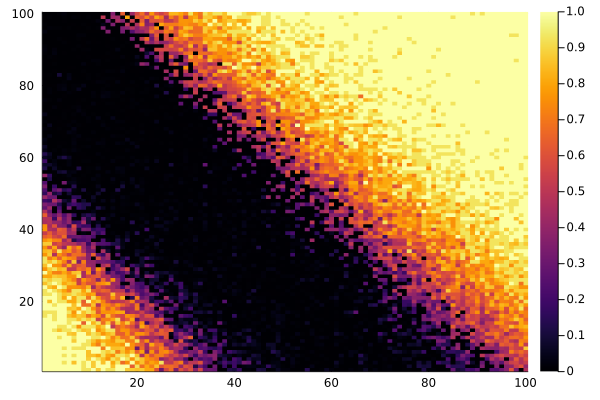

In [18]:
using Plots
heatmap(corrs)